# HLMA 408: Lois gaussiennes et visualisation interactive

***
> __Auteur__: Joseph Salmon <joseph.salmon@umontpellier.fr>

In [1]:
from download import download
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, t, f
from ipywidgets import interact, IntSlider  # Pour les widgets
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

In [4]:
dirname = "../prebuiltimages/"
imageformat = ".pdf"

In [5]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.



## Visualisation des densités de Student : impact du nombre de degrés de liberté

In [6]:
x = np.linspace(-5, 5, num=400)

In [7]:
def student_vis(df=5):
    """Visualize the Gaussian quantile"""
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, t.pdf(x, df=df), '-', lw=2, label=r"$t({0})$".format(df))
    ax1.plot(x, norm.pdf(x), '--',color='k', lw=1, label=r"$\varphi_{{0,1}}$")
    ax1.set_ylim(0, 0.6)
    ax1.set_title(r"Densité d'une loi de student en fonction du nombre de degrés de liberté :" + "\n" +
                  r"$k = {0}$".format(df), fontsize=10)
    plt.legend()
    my_saving_display(fig, dirname, "student"+str(df), imageformat, saving=saving)
    plt.show()

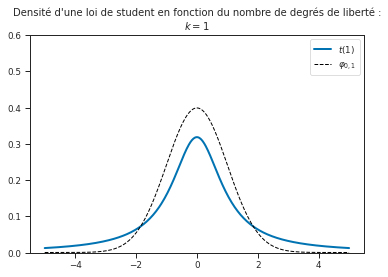

In [8]:
interact(student_vis(df=1), df=(1, 20, 1));

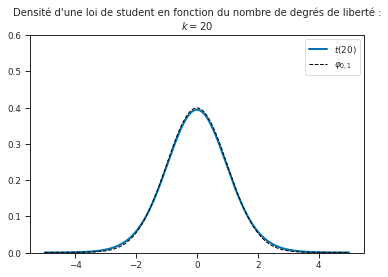

In [9]:
interact(student_vis(df=20), df=(1, 20, 1));

In [10]:
interact(student_vis, df=(1, 20, 1));

interactive(children=(IntSlider(value=5, description='df', max=20, min=1), Output()), _dom_classes=('widget-in…

## Visualisation des quantiles d'une loi de Student

In [11]:
def student_quantile(alpha=0.05, df=10):
    """Visualize Student quantiles"""

    quantile_up = t.ppf(1 - alpha / 2, df=df)
    quantile_down = -t.ppf(1 - alpha / 2, df=df)
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, t.pdf(x, df=df), '-', lw=2)
    ax1.set_ylim(0, 0.5)
    ax1.fill_between(x, 0, t.pdf(x, df=df), where=(quantile_down <= x) & (
        x <= quantile_up), color=sns.color_palette()[0])
    ax1.set_title(r"Aire $ \alpha = {0:.2f},$ $t_{{1-\alpha/2, n-1}}={1:.2f}$  $(n={2})$ ".format(1 - alpha, quantile_up, df), fontsize=10)
    plt.show()
    my_saving_display(fig, dirname, "student"+str(df)+"quantile", imageformat, saving=saving)
 

In [12]:
interact(student_quantile, alpha=(0.001, .999, 0.001), df=(1, 20, 1));

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.999, min=0.001, step=0.001), IntSlide…

In [13]:
# Figures pour les slides:

In [14]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


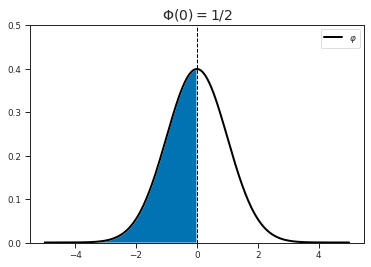

In [15]:
x = np.linspace(-5, 5, 300)

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= 0)
plt.axvline(x=0, c='k', ls="--", lw=1)
plt.title("$\Phi(0)=1/2$", fontsize=14)
plt.legend()
my_saving_display(fig, dirname, "Gaussian_phi0", imageformat, saving=saving)

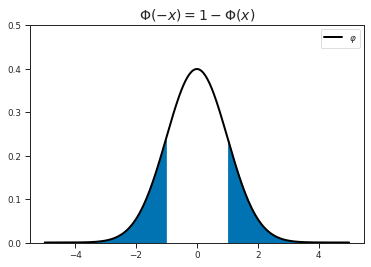

In [16]:
x = np.linspace(-5, 5, 300)

lim = 1
fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= -
                 lim, color=sns.color_palette()[0])
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x >=
                 lim, color=sns.color_palette()[0])
# plt.axvline(x=0, c='k', ls="--", lw=1)
plt.title("$\Phi(-x)=1-\Phi(x)$", fontsize=14)
plt.legend()
my_saving_display(fig, dirname, "Gaussian_phi_moins_x",
                  imageformat, saving=saving)

In [17]:
norm.cdf(1, 0, 1)-norm.cdf(-1, 0, 1)

0.6826894921370859

In [18]:
2 * norm.cdf(1, 0, 1)-1

0.6826894921370859

In [19]:
2 * norm.cdf(2, 0, 1)-1

0.9544997361036416

# Loi de Fisher

## Quantiles

In [20]:
from scipy.stats import f
dfn, dfd = 4, 5  # degré de liberté n=numérateur, d=dénominateur
quantile = 1 - 0.05
f.ppf(quantile, dfn, dfd)

5.192167772803923

## Visualisation des densités

In [21]:
x_f = np.linspace(0.001, 8, 300)


def fisher_vis(df_1=16, df_2=8):
    """Visualize the Fisher distrubution."""
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x_f, f.pdf(x_f, df_1, df_2), '-', lw=2,
             label=r"$f({0},{1})$".format(df_1, df_2))
    ax1.set_ylim(0, 1)
    ax1.set_title(r"Densité d'une loi de Fisher : " +
                  r"$F({0},{1})$".format(df_1, df_2), fontsize=10)
    plt.legend()
    my_saving_display(fig, dirname, "fisher" + str(df_1) + '_' +
                      str(df_2), imageformat, saving=saving)
    plt.show()

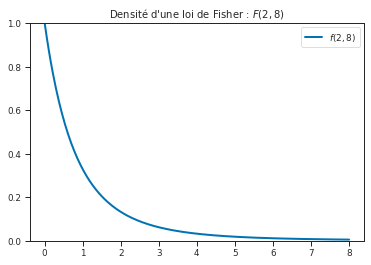

In [22]:
fisher_vis(df_1=2, df_2=8)

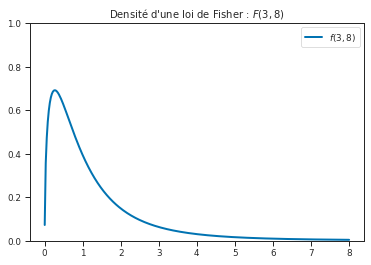

In [23]:
fisher_vis(df_1=3, df_2=8)

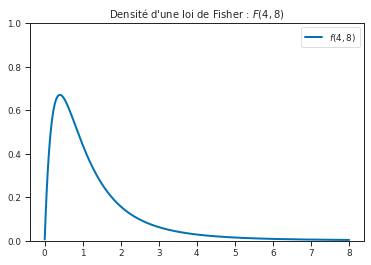

In [24]:
fisher_vis(df_1=4, df_2=8)

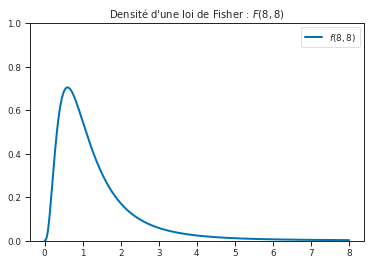

In [25]:
fisher_vis(df_1=8, df_2=8)

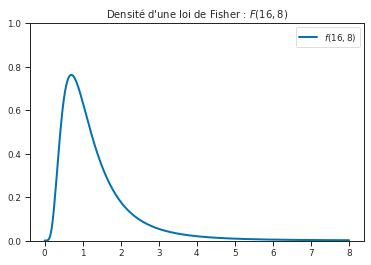

In [26]:
fisher_vis(df_1=16, df_2=8)

In [27]:
def fisher_quantile(alpha=0.2, df_1=16, df_2=8, saving=False):
    """Visualize Student quantiles"""

    quantile_up = f.ppf(1 - alpha / 2, df_1, df_2)
    quantile_down = f.ppf(alpha / 2, df_1, df_2)
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

    ax1.plot(x_f, f.pdf(x_f, df_1, df_2), '-', lw=2)
    ax1.set_ylim(0, 1)
    ax1.fill_between(x_f, 0, f.pdf(x_f, df_1, df_2), where=(quantile_down <= x_f) & (
        x_f <= quantile_up), color=sns.color_palette()[0])
    ax1.set_title(r"Aire $ \alpha = {0:.2f},$ $f_{{1-\alpha/2}}(d_1-1,d_2-1)={1:.2f}$  $(d_1,d_2)=({2},{3})$ ".format(
        1 - alpha, quantile_up, df_1, df_2), fontsize=10)
    plt.show()
    my_saving_display(fig, dirname, "fisher" + str(df_1) + '_' + str(df_2)
                      + "quantile", imageformat, saving=saving)

In [28]:
interact(fisher_quantile, alpha=(0.001, .999, 0.001),
         df_1=IntSlider(min=1, max=20, step=1, value=5),
         df_2=IntSlider(min=1, max=20, step=1, value=10));

interactive(children=(FloatSlider(value=0.2, description='alpha', max=0.999, min=0.001, step=0.001), IntSlider…

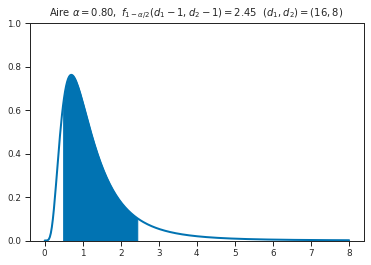

In [29]:
fisher_quantile(saving=True)

## Loi de Fisher et simulation

In [30]:
n1 = 8
n2 = 12

sig = 3

mu1 = 0
mu2 = 3

In [31]:
from scipy.stats import norm
n_repetition = 5000
rv1 = norm.rvs(size=[n1, n_repetition], loc=mu1, scale=sig)
rv2 = norm.rvs(size=[n2, n_repetition], loc=mu2, scale=sig)

In [32]:
f1 = rv1.var(axis=0, ddof=1)
f2 = rv2.var(axis=0, ddof=1)

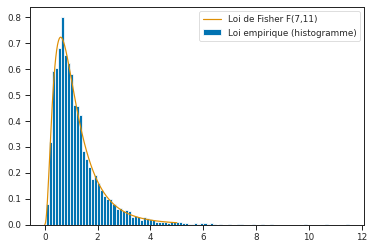

In [33]:
fig = plt.figure()
ax = fig.gca()
ax.hist(f1/f2, density=True, bins=100, label='Loi empirique (histogramme)')
x_f = np.linspace(0.001, 5, 300)
ax.plot(x_f, f.pdf(x_f, n1-1, n2-1),
        label='Loi de Fisher F({0},{1})'.format(n1-1, n2-1))
plt.legend()
plt.show()

In [34]:
def fisher_sampling(n_repet=2000, n1=16, n2=8, mu1=0, mu2=3, sig=4):
    """Visualize Student quantiles"""
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    rv1 = norm.rvs(size=[n1, n_repetition], loc=mu1, scale=sig)
    rv2 = norm.rvs(size=[n2, n_repetition], loc=mu2, scale=sig)

    f1 = rv1.var(axis=0, ddof=1)
    f2 = rv2.var(axis=0, ddof=1)
    ax.hist(f1/f2, density=True, bins=300, label='Loi empirique (histogramme)')
    x_f = np.linspace(0.001, 10, 300)
    
    ax.plot(x_f, f.pdf(x_f, n1-1, n2-1),
            label='Loi de Fisher F({0},{1})'.format(n1-1, n2-1))
    ax.set_xlim(-0.1,np.max(f1/f2))
    plt.legend()
    plt.show()

In [35]:
interact(fisher_sampling, n_repet=IntSlider(min=1, max=20000, step=100, value=5),
         n1=IntSlider(min=1, max=20, step=1, value=5),
         n2=IntSlider(min=1, max=20, step=1, value=10),
         mu1=(0, 5, 0.1),
         mu2=(0, 5, 0.1),
         sig=(1, 10, 1));

interactive(children=(IntSlider(value=5, description='n_repet', max=20000, min=1, step=100), IntSlider(value=5…